<a href="https://colab.research.google.com/github/Apolo073/Coderhouse_DataScience_EntregaFinal/blob/main/G%C3%A9neroCanciones_Stein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA SCIENCE CODERHOUSE [#61750]**

ALUMNO: STEIN NAHUEL

##1) INTRODUCCIÓN DE DATASET - RESUMEN METADATA

###Descripción del Problema

En este trabajo práctico, se aborda el desafío de predecir el género musical de una canción basándose en sus características. Utilizando dataframes seleccionados que contienen diversas propiedades de las canciones, el objetivo es desarrollar modelos de machine learning que puedan clasificar correctamente el género musical. Este enfoque permitirá explorar la relación entre las características de las canciones y sus géneros, mejorando así la comprensión y capacidad de predicción en el ámbito musical.

###Objetivo

El objetivo principal de este proyecto es desarrollar modelos de machine learning capaces de predecir el género musical de una canción basándose en sus características. Al analizar diversas propiedades de las canciones, como el tempo, la energía, la acústica, entre otras, se busca identificar patrones que permitan clasificar correctamente el género musical. Este enfoque no solo mejorará la precisión en la predicción de géneros, sino que también proporcionará una mayor comprensión de cómo las características musicales influyen en la categorización de las canciones.

###Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?resource=download&select=train.csv

###Importación de librerías y carga de datos

In [1]:
#Se importan las librerías necesarias para el análisis y modelado de datos
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter # Para formatear los ejes de los gráficos
import time # Para medir el tiempo de ejecución


# Librerías de Scikit-learn para preprocesamiento y modelado
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, mean_squared_error, confusion_matrix

In [2]:
#Se cargan Datasets:
url_train = "https://raw.githubusercontent.com/Apolo073/Coderhouse_DataScience_EntregaFinal/refs/heads/main/train.csv"
url_test = "https://raw.githubusercontent.com/Apolo073/Coderhouse_DataScience_EntregaFinal/refs/heads/main/test.csv"
url_submission = "https://raw.githubusercontent.com/Apolo073/Coderhouse_DataScience_EntregaFinal/refs/heads/main/submission.csv"

train_df = pd.read_csv(url_train)
test_df = pd.read_csv(url_test)
submission_df = pd.read_csv(url_submission)

### Número de filas/columnas

In [3]:
train_df.shape

(17996, 17)

In [4]:
test_df.shape

(7713, 16)

In [5]:
submission_df.shape

(7713, 11)

***Esta sección del código muestra las dimensiones de los dataframes utilizados en el proyecto. El dataframe de entrenamiento (train_df) contiene 17.996 filas y 17 columnas, el dataframe de prueba (test_df) tiene 7.713 filas y 16 columnas, y el dataframe de envío (submission_df) cuenta con 7.713 filas y 11 columnas.***

### Tipo de Datos

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

In [8]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Acoustic/Folk_0  7713 non-null   int64
 1   Alt_Music_1      7713 non-null   int64
 2   Blues_2          7713 non-null   int64
 3   Bollywood_3      7713 non-null   int64
 4   Country_4        7713 non-null   int64
 5   HipHop_5         7713 non-null   int64
 6   Indie Alt_6      7713 non-null   int64
 7   Instrumental_7   7713 non-null   int64
 8   Metal_8          7713 non-null   int64
 9   Pop_9            7713 non-null   int64
 10  Rock_10          7713 non-null   int64
dtypes: int64(11)
memory usage: 663.0 KB


***Esta sección del código proporciona información detallada sobre el tipo de datos y la cantidad de valores no nulos en cada columna de los dataframes. También se observa que hay columnas con valores faltantes que deberán ser tratados en el proceso de preprocesamiento de datos.***



### Diccionario - Mapeo de género

In [9]:
# Se obtienen los nombres de las columnas como una lista
column_names = list(submission_df.columns)

# Se crea un diccionario de mapeo usando un bucle for
mapping_dict = {}
for index, name in enumerate(column_names):
    key_part = name.split('_')[0]
    mapping_dict[index] = key_part

# Se mapea la columna 'Class' a 'Genre' usando el diccionario de mapeo
train_df['Genre'] = train_df['Class'].apply(lambda x: mapping_dict.get(x))

***Explicación***:

1. Primero, obtengo una lista con los nombres de las columnas del dataframe submission_df.

2. Luego, creo un diccionario (mapping_dict) que mapea los índices de las columnas a la primera parte del nombre de cada columna (antes del guion bajo). Para ello, utilizo un bucle for que recorre los nombres de las columnas.

3. Finalmente, utilizo el diccionario de mapeo para transformar los valores de la columna 'Class' en el dataframe train_df a sus correspondientes géneros musicales, creando una nueva columna llamada 'Genre'. Esto lo hago aplicando una función lambda que utiliza el diccionario de mapeo.

### Primeros Registros

In [ ]:
train_df.head(3)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.0171,NaN,0.0849,0.899,134.071,234596.0,4,5,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.0011,0.004010,0.1010,0.569,116.454,251733.0,4,10,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.4860,0.000196,0.3940,0.787,147.681,109667.0,4,6,Indie Alt


In [ ]:
test_df.head(3)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.0726,0.000093,0.1390,0.466,134.480,318027.0,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.0004,0.000009,0.2630,0.291,151.937,220413.0,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.0048,NaN,0.0289,0.625,122.019,202960.0,4


### Cuenta de valores Nulos

In [ ]:
# Contar los valores nulos por columna
null_counts_train = train_df.isnull().sum()
print(null_counts_train)

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
Genre                    0
dtype: int64


In [ ]:
null_counts_test = test_df.isnull().sum()
print(null_counts_test)

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64


## **2) DATA ADQUISITION / DATA WRANGLING**

### Outliers

In [10]:
# Se Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

def calcular_outliers_iqr(train_df):
    resultados = []

    for columna in train_df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if train_df[columna].nunique() == 2:
            continue

        q1 = train_df[columna].quantile(0.25)
        q3 = train_df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = train_df[(train_df[columna] < limite_inferior) | (train_df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(train_df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

***Explicación***:

1. Defino la función calcular_outliers_iqr que toma como argumento un dataframe (train_df).

2. Creo una lista vacía llamada resultados para almacenar el porcentaje de outliers de cada columna.

3. Recorro todas las columnas numéricas del dataframe utilizando select_dtypes(include='number'). Si una columna tiene solo dos valores únicos (nunique() == 2), la excluyo del análisis.

4. Para cada columna, calculo el primer cuartil (q1) y el tercer cuartil (q3). Luego, determino el rango intercuartílico (IQR) y los límites inferior y superior para identificar outliers.

5. Identifico los outliers como aquellos valores que están por debajo del límite inferior o por encima del límite superior. Calculo el porcentaje de outliers dividiendo el número de outliers por el total de filas del dataframe y multiplicando por 100.

6. Almacenamiento de resultados: Almaceno el nombre de la columna y el porcentaje de outliers en la lista resultados.

7. Convierto la lista resultados en un dataframe (outliers_df) y lo ordeno por el porcentaje de outliers en orden descendente. Excluyo las columnas con 0% de outliers y reinicio los índices del dataframe.

In [ ]:
calcular_outliers_iqr(train_df)

,Columna,Porcentaje_Outliers
0,duration_in min/ms,18.031785
1,instrumentalness,13.380751
2,speechiness,11.302512
3,time_signature,8.585241
4,liveness,5.312292
5,loudness,4.545455
6,Popularity,0.227828
7,tempo,0.200044
8,danceability,0.172261


In [ ]:
def plot_boxplot_outliers(train_df, columnas_outliers):
    # Normalizá las columnas con outliers
    scaler = MinMaxScaler()
    df_normalized = train_df.copy()
    df_normalized[columnas_outliers] = scaler.fit_transform(train_df[columnas_outliers])

    # Configuración del gráfico
    plt.figure(figsize=(len(columnas_outliers) * 2, 10))
    sb.boxplot(data=df_normalized[columnas_outliers], orient='v')

    # Ajustes finales del gráfico
    plt.title('Boxplot de Variables con Outliers (Normalizadas)', fontsize=14)
    plt.ylabel('Valor Normalizado', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
outliers_df = calcular_outliers_iqr(train_df)

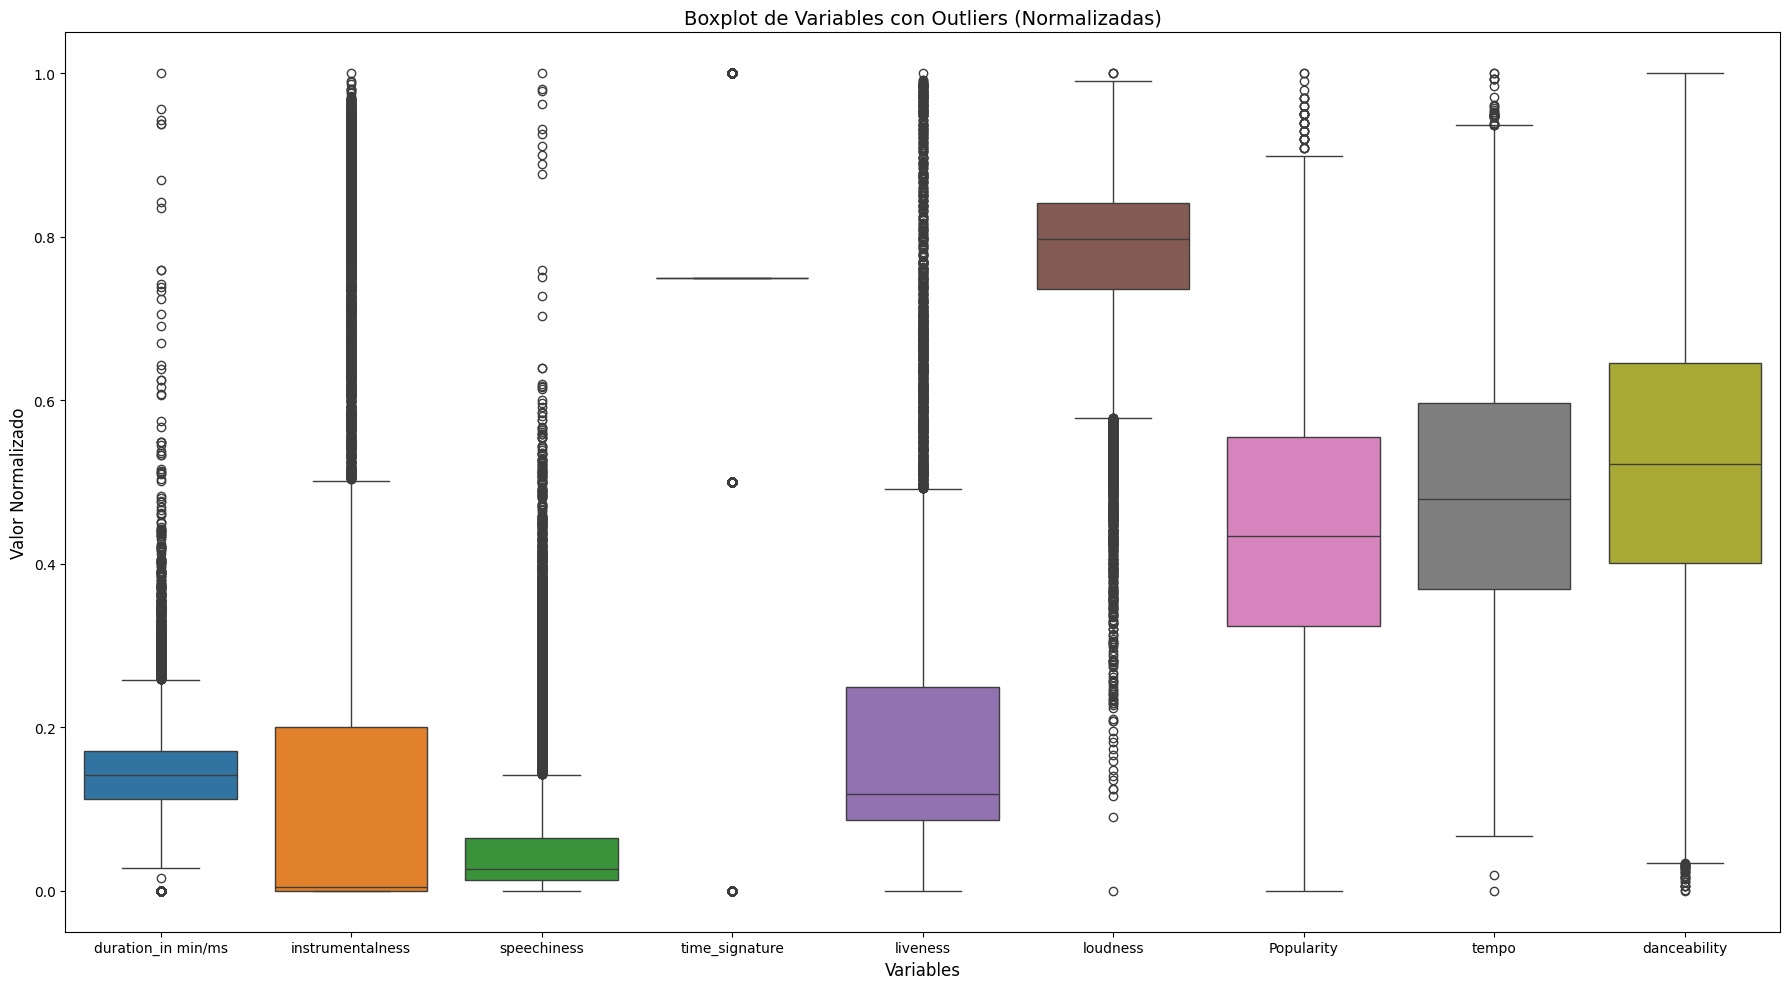

In [ ]:
columnas_outliers = outliers_df['Columna'].tolist()
plot_boxplot_outliers(train_df, columnas_outliers)

### Tratamiento de Valores nulos

***Explicación:***

1. A la columna 'KEY' aunque los valores de esta columna son numéricos, se trata de una variable categórica. Por lo tanto, se decide imputar los valores nulos con la moda (el valor más frecuente).

2. A la columna 'POPULARITY', por tener un bajo porcentaje de outliers (menos del 1%). Por ello, se decide imputar los valores nulos con la mediana, ya que la mediana es menos sensible a los outliers que la media.

3. A la columna 'INSTRUMENTALNESS', dado que posee un alto porcentaje de outliers (más del 10%), se decide imputar los valores nulos con la media. Aunque la media puede verse afectada por los outliers, en este caso se considera la mejor opción.

In [11]:
def imputar_valores_nulos(data):

  # Imputar columna KEY con la moda
    moda_key = data['key'].mode()[0]
    data['key'] = data['key'].fillna(moda_key)

    # Imputar columna POPULRITY con la mediana
    mediana_popularity = data['Popularity'].median()
    data['Popularity'] = data['Popularity'].fillna(mediana_popularity)

    # Imputar columna INSTRUMENTALNESS con la media
    media_instrumentalness = data['instrumentalness'].mean()
    data['instrumentalness'] = data['instrumentalness'].fillna(media_instrumentalness)

    return data

    # Aplicar la función de imputación
train_df = imputar_valores_nulos(train_df)

# Contar los valores nulos por columna nuevamente
null_counts_train = train_df.isnull().sum()
print(null_counts_train)

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Genre                 0
dtype: int64


## **3) ANÁLISIS EXPLORATORIO DE DATOS**

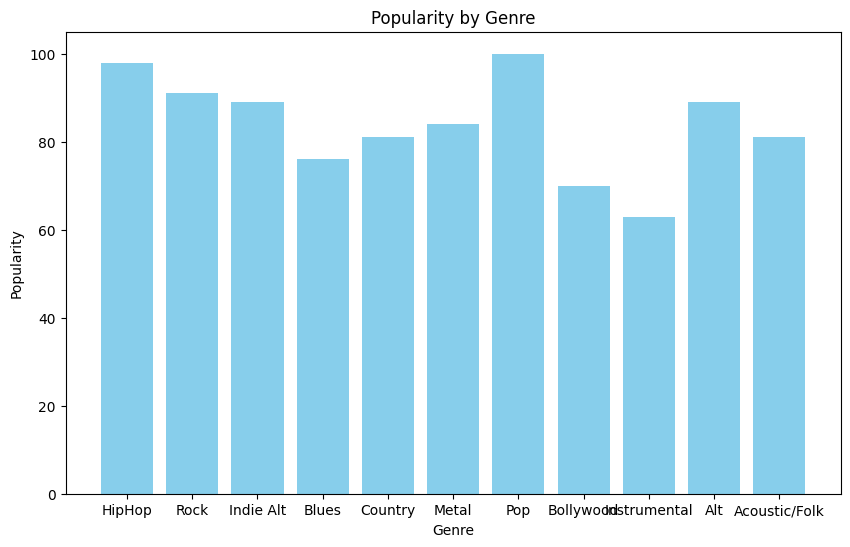

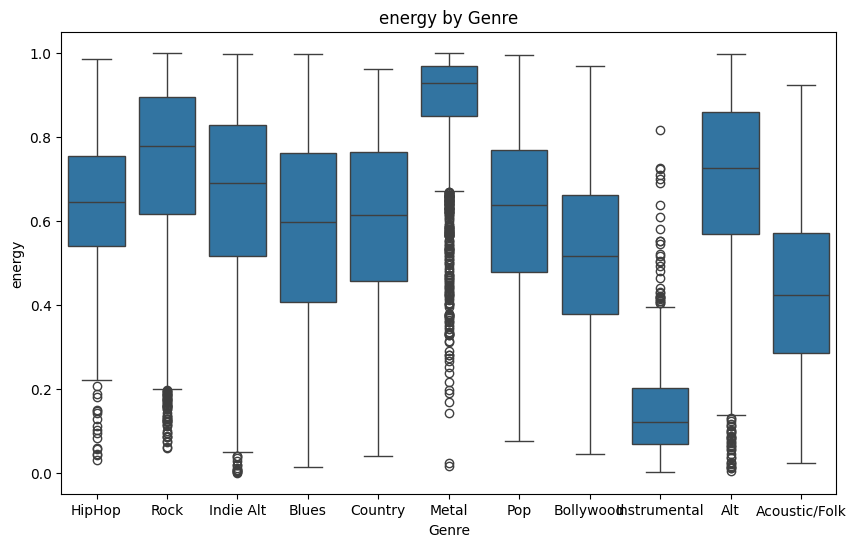

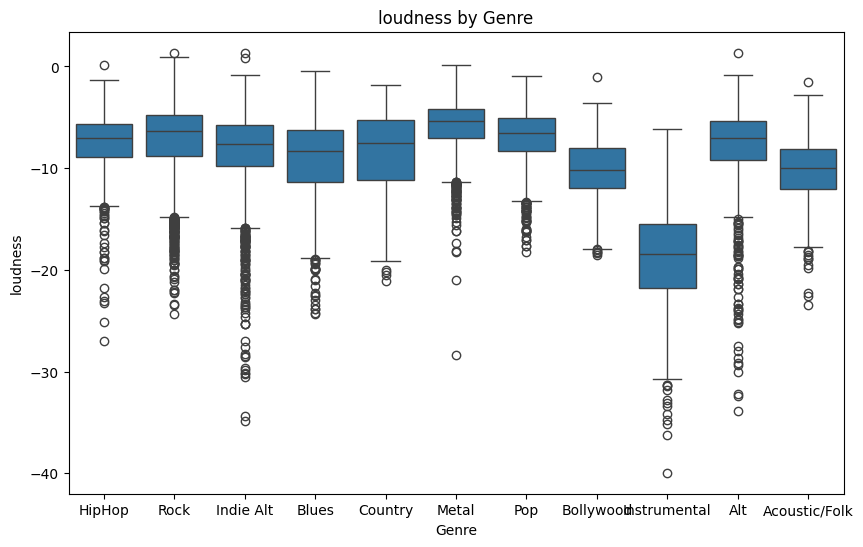

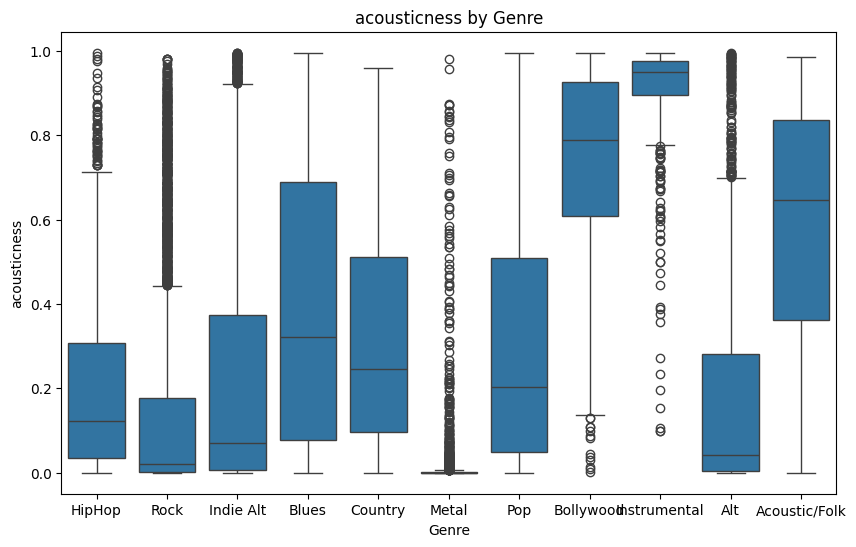

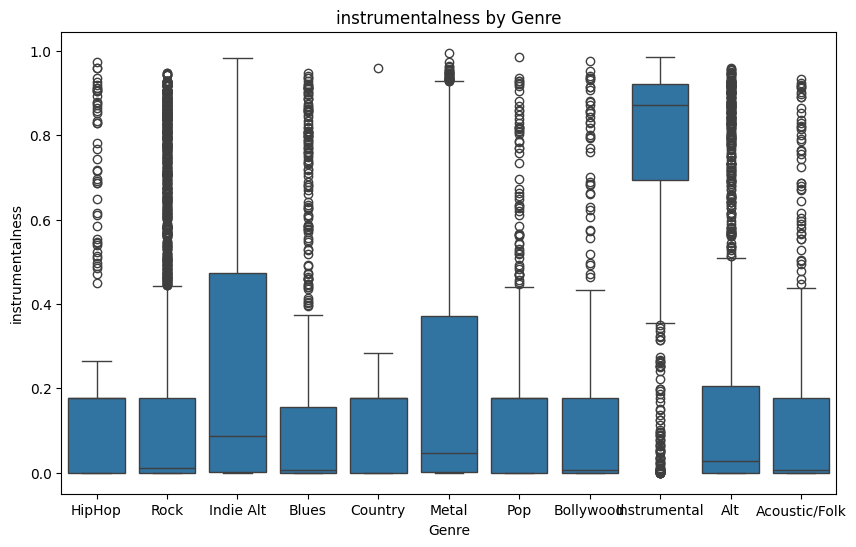

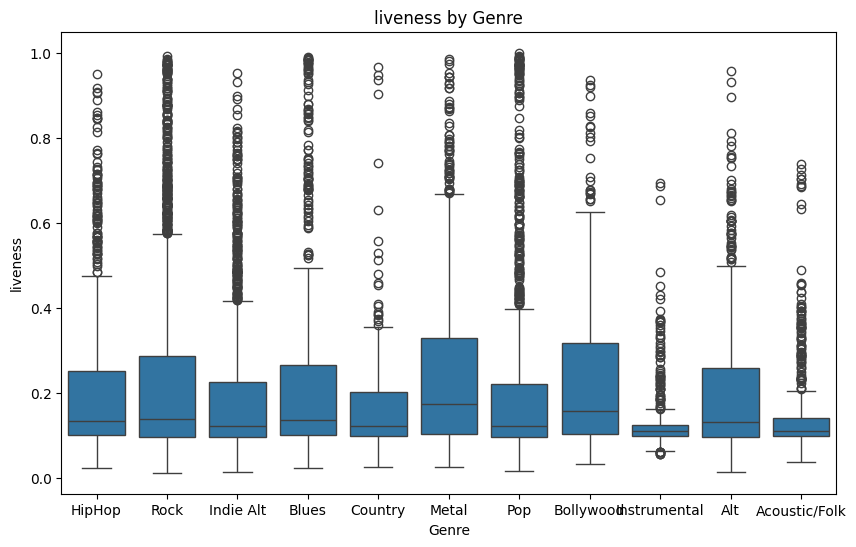

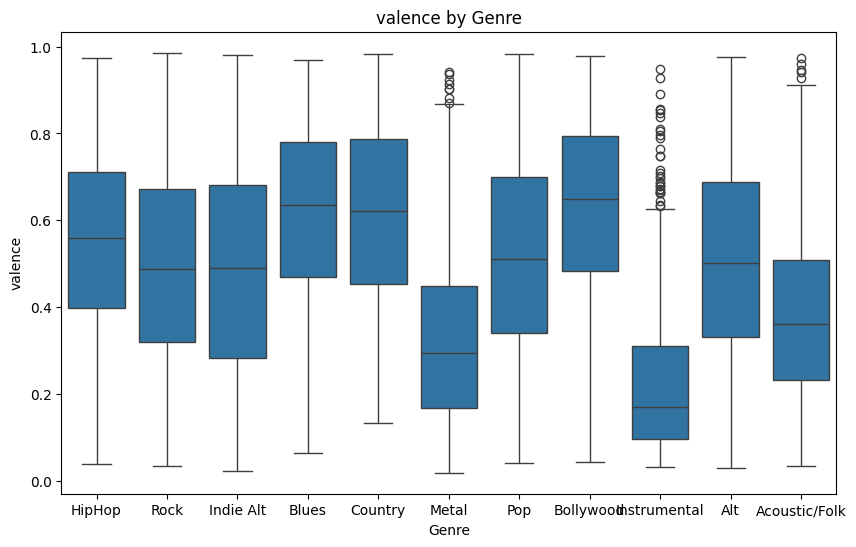

In [12]:
# Gráfico de barras de popularidad por género (matplotlib)
plt.figure(figsize=(10,6))
plt.bar(train_df['Genre'], train_df['Popularity'], color='SkyBlue')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.title('Popularity by Genre')
plt.show()

# Nuevo gráfico: Boxplot de características numéricas por género (seaborn)
numeric_features = ['energy', 'loudness', 'acousticness', 'instrumentalness','liveness', 'valence']

for feature in numeric_features:
    plt.figure(figsize=(10,6))
    sb.boxplot(x='Genre', y=feature, data=train_df)
    plt.xlabel('Genre')
    plt.ylabel(feature)
    plt.title(f'{feature} by Genre')
    plt.show()

***Explicación***:

1. Gráfico de barras de popularidad por género: Utilizo matplotlib para crear un gráfico de barras que muestra la popularidad promedio de las canciones por género.

2. Boxplot de características numéricas por género: Utilizo seaborn para crear boxplots que muestran la distribución de varias características numéricas (como energy, loudness, acousticness, instrumentalness, liveness y valence) por género. Esto ayuda a visualizar cómo varían estas características entre los diferentes géneros musicales.

## **4) ANÁLISIS ESTADÍSTICO DE DATOS**

### Análisis Univariado

***Explicación:***

1. Distribución de Popularidad: Utilizo seaborn para crear un gráfico de densidad (KDE) que muestra la distribución de la popularidad de las canciones.

2. Distribución de la Bailabilidad: Creo un gráfico de densidad para visualizar la distribución de la característica danceability.

3. Distribución de la Energía: Utilizo un gráfico de densidad para mostrar la distribución de la característica energy.

4. Distribución de la Instrumentalidad: Creo un gráfico de densidad para visualizar la distribución de la característica instrumentalness.

Estos gráficos ayudan a entender cómo se distribuyen las diferentes características musicales en el dataset, proporcionando una visión clara de la variabilidad y tendencias en los datos.

<ipython-input-13-a4347001db2a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df['Popularity'], shade=True, color='green')


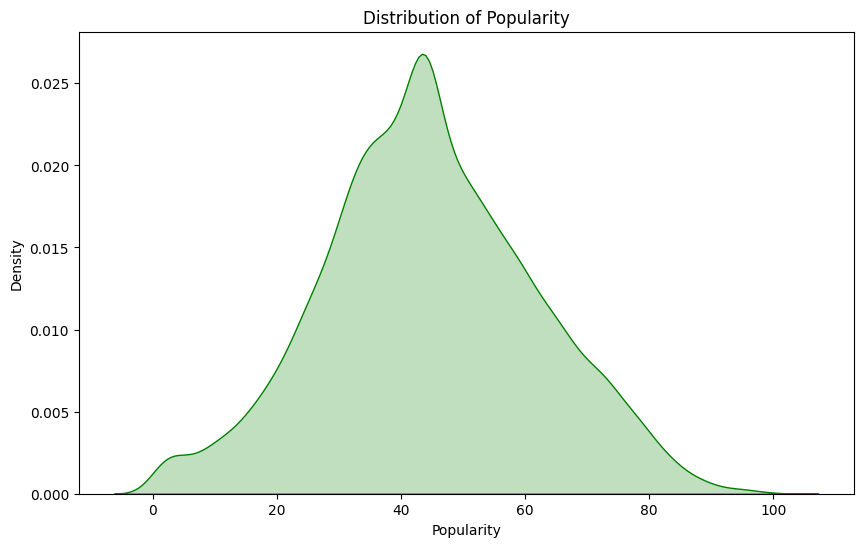

<ipython-input-13-a4347001db2a>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df['danceability'], shade=True, color='green')


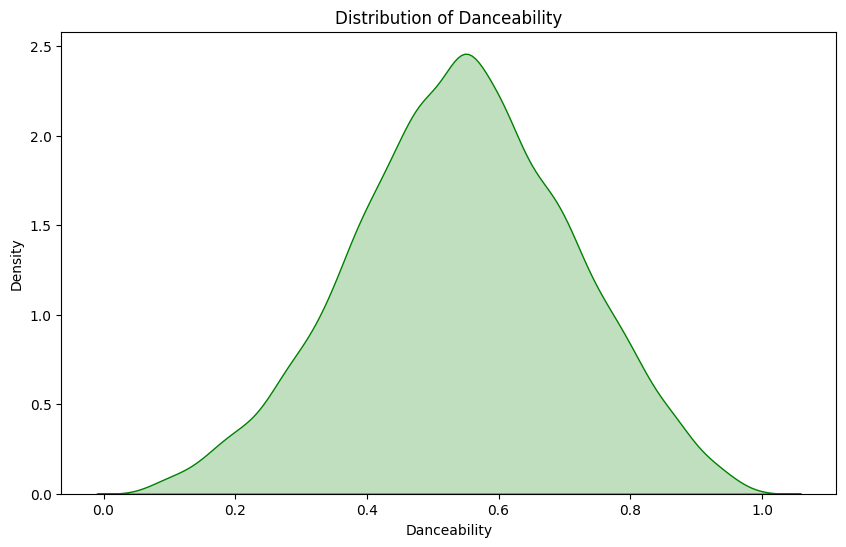

<ipython-input-13-a4347001db2a>:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df['energy'], shade=True, color='orange')


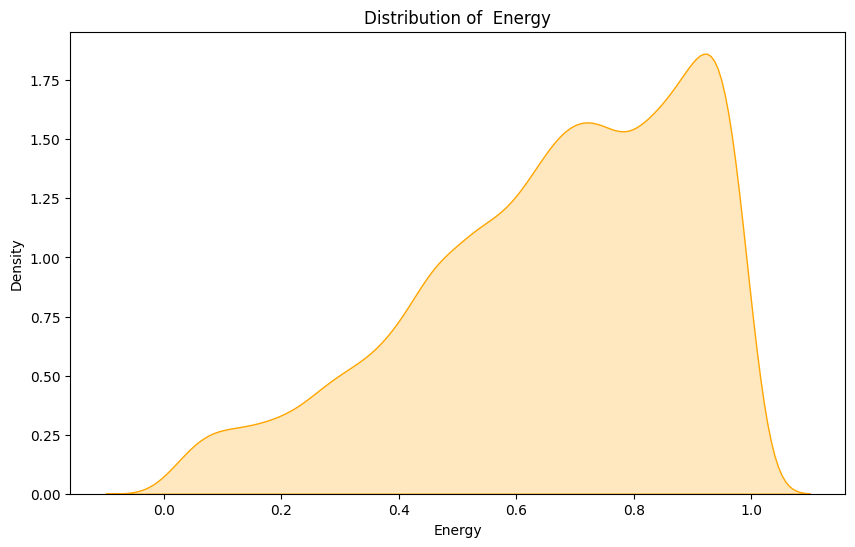

<ipython-input-13-a4347001db2a>:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(train_df['instrumentalness'], shade=True, color='red')


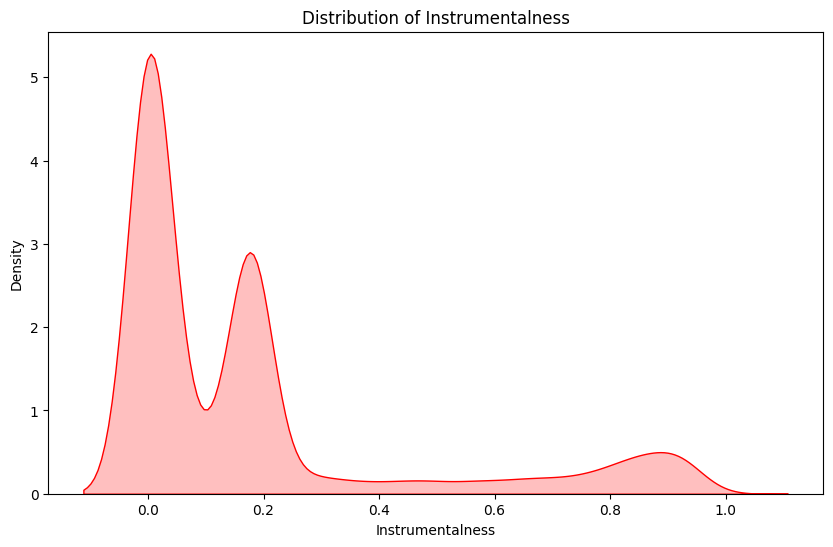

In [13]:
# Distribión de Popularidad
plt.figure(figsize=(10,6))
sb.kdeplot(train_df['Popularity'], shade=True, color='green')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('Distribution of Popularity')
plt.show()

# Distribución de la Bailabilidad
plt.figure(figsize=(10,6))
sb.kdeplot(train_df['danceability'], shade=True, color='green')
plt.xlabel('Danceability')
plt.ylabel('Density')
plt.title('Distribution of Danceability')
plt.show()

# Distribución de la Energía
plt.figure(figsize=(10,6))
sb.kdeplot(train_df['energy'], shade=True, color='orange')
plt.xlabel('Energy')
plt.ylabel('Density')
plt.title('Distribution of  Energy')
plt.show()

# Distribución de la Instrumentalidad
plt.figure(figsize=(10,6))
sb.kdeplot(train_df['instrumentalness'], shade=True, color='red')
plt.xlabel('Instrumentalness')
plt.ylabel('Density')
plt.title('Distribution of Instrumentalness')
plt.show()

### Análisis Bivariado

***Explicación:***

1. Gráfico de dispersión de Popularity vs Valence: Utilizo seaborn para crear un gráfico de dispersión que muestra la relación entre la popularidad y la valencia de las canciones, coloreado por género.

2. Gráfico de dispersión de Valence vs Speechiness: Creo un gráfico de dispersión para visualizar la relación entre la valencia y la hablabilidad de las canciones, coloreado por género.

3. Gráfico de dispersión de Energy vs Loudness: Utilizo un gráfico de dispersión para mostrar la relación entre la energía y la sonoridad de las canciones, coloreado por género.

4. Creo un gráfico de dispersión para visualizar la relación entre la vivacidad y la valencia de las canciones, coloreado por género.

5. Gráfico de dispersión de Loudness vs Tempo: Utilizo un gráfico de dispersión para mostrar la relación entre la sonoridad y el tempo de las canciones, coloreado por género.

Estos gráficos de dispersión ayudan a visualizar las relaciones entre diferentes características musicales y cómo varían entre los géneros, proporcionando una visión más profunda de las interacciones en los datos.

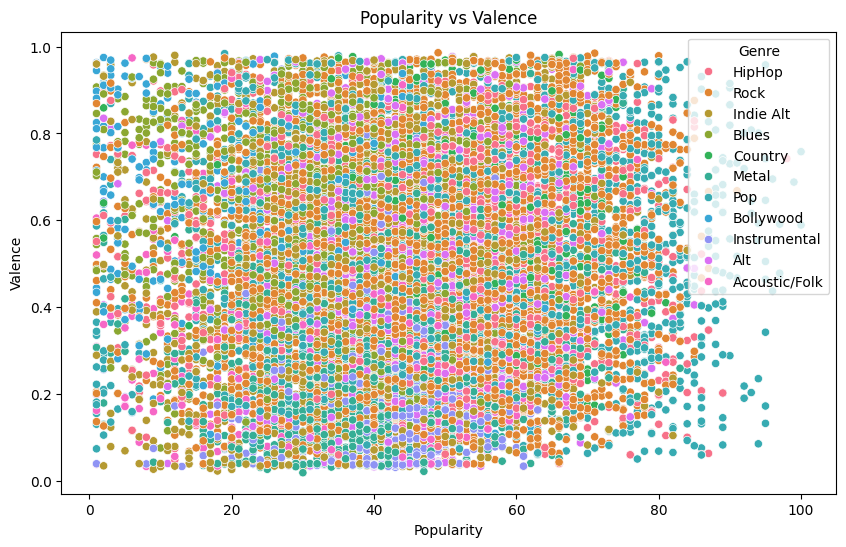

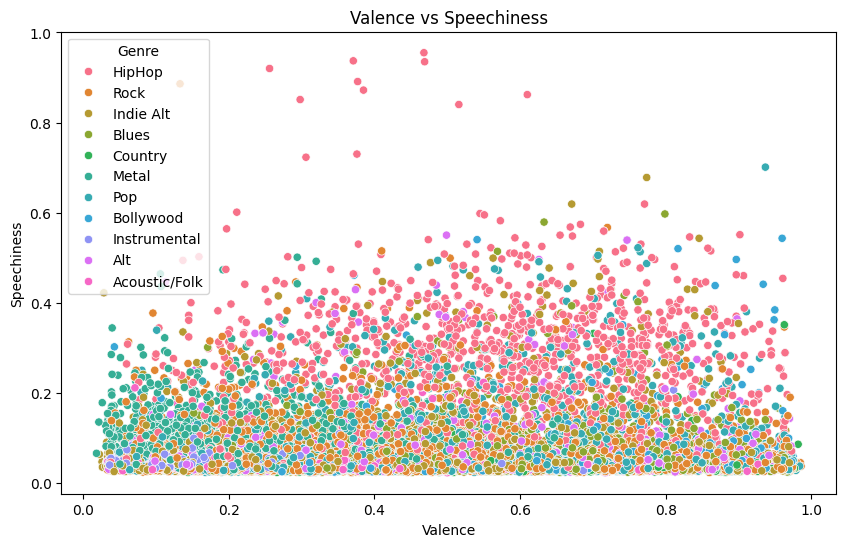

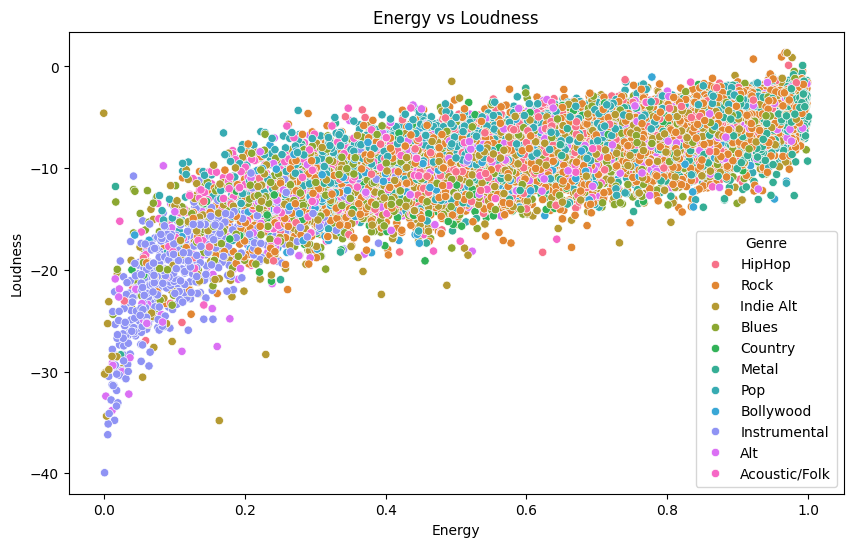

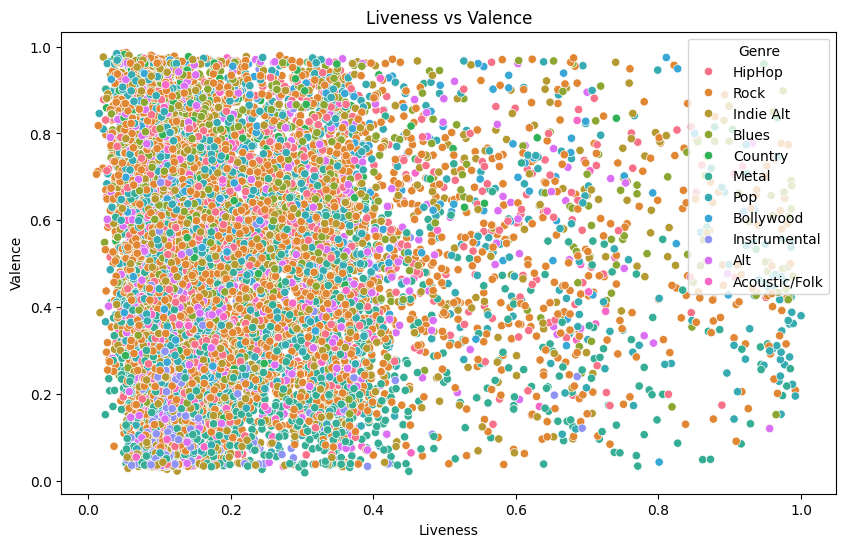

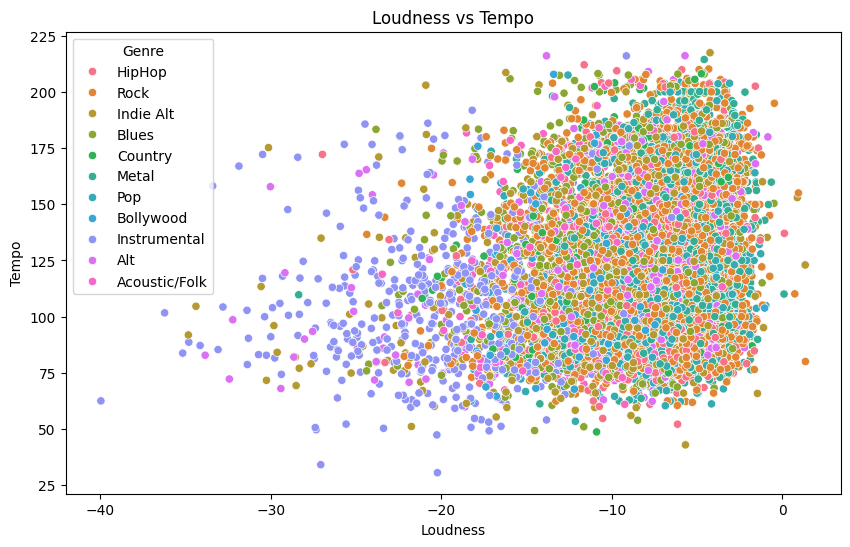

In [14]:
# Gráfico de dispersión de Popularity vs Valence
plt.figure(figsize=(10,6))
sb.scatterplot(x='Popularity', y='valence', hue='Genre', data=train_df)
plt.xlabel('Popularity')
plt.ylabel('Valence')
plt.title('Popularity vs Valence')
plt.show()

# Gráfico de dispersión de Valence vs Speechiness
plt.figure(figsize=(10,6))
sb.scatterplot(x='valence', y='speechiness', hue='Genre', data=train_df)
plt.xlabel('Valence')
plt.ylabel('Speechiness')
plt.title('Valence vs Speechiness')
plt.show()

# Gráfico de dispersión de Energy vs Loudness
plt.figure(figsize=(10,6))
sb.scatterplot(x='energy', y='loudness', hue='Genre', data=train_df)
plt.xlabel('Energy')
plt.ylabel('Loudness')
plt.title('Energy vs Loudness')
plt.show()

# Gráfico de dispersión de Liveness vs Valence
plt.figure(figsize=(10,6))
sb.scatterplot(x='liveness', y='valence', hue='Genre', data=train_df)
plt.xlabel('Liveness')
plt.ylabel('Valence')
plt.title('Liveness vs Valence')
plt.show()

# Gráfico de dispersión de Loudness vs Tempo
plt.figure(figsize=(10,6))
sb.scatterplot(x='loudness', y='tempo', hue='Genre', data=train_df)
plt.xlabel('Loudness')
plt.ylabel('Tempo')
plt.title('Loudness vs Tempo')
plt.show()

### Análisis Multivariado

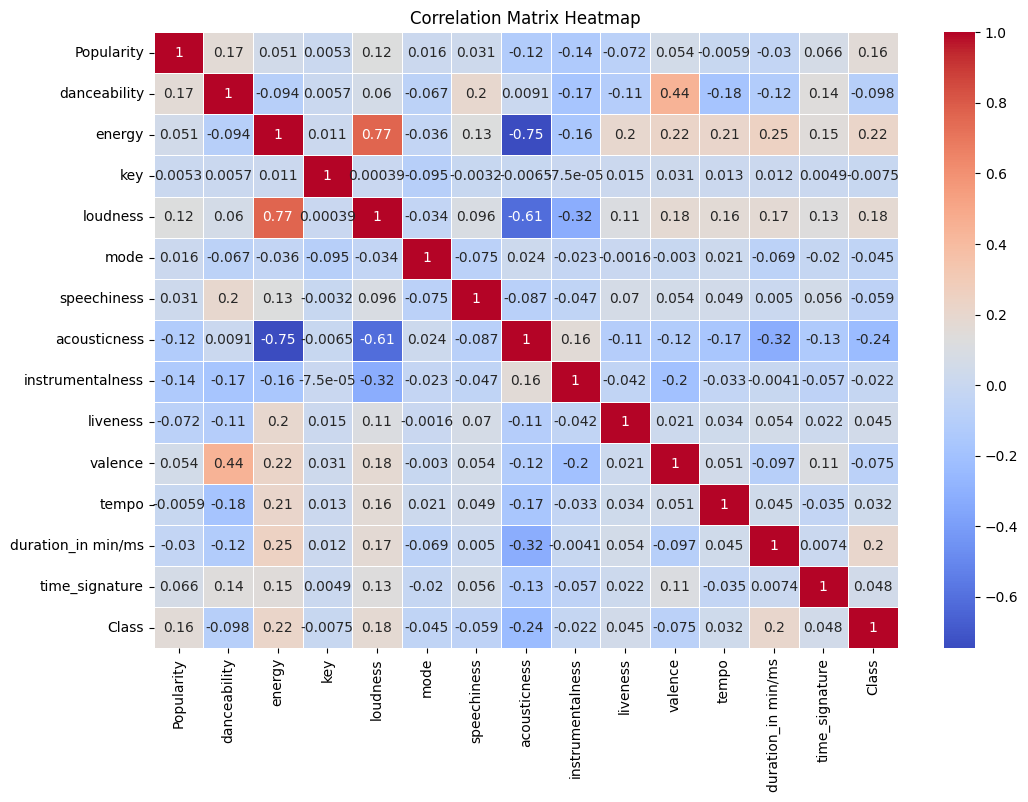

In [15]:
# Seleccionar solo las columnas numéricas
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Crear una matriz de correlación
correlation_matrix = train_df[numeric_cols].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12,8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

***Explicación:***

Este análisis multivariado ayuda a identificar relaciones y patrones entre múltiples características numéricas, proporcionando una visión más completa de cómo interactúan las variables en el dataset.

##**5) PREPROCESAMIENTO DE DATOS**

### Columnas irrelevantes

In [16]:
##Se muestran columnas con valores únicos para identificación de columnas irrelevantes

print(train_df.nunique())

Artist Name            9149
Track Name            15129
Popularity              100
danceability            909
energy                 1208
key                      11
loudness               9002
mode                      2
speechiness            1194
acousticness           3930
instrumentalness       4254
liveness               1459
valence                1320
tempo                 13562
duration_in min/ms    14121
time_signature            4
Class                    11
Genre                    11
dtype: int64


### Encoding & Normalizado

1. Elimino la columna Track Name del dataframe train_df porque se considera irrelevante para el análisis y modelado. Esta columna no aporta información útil para la predicción del género musical.

2. Utilizo LabelEncoder de sklearn para convertir la columna categórica Artist Name en valores numéricos.

In [17]:
# Eliminar columnas irrelevantes
irrelevant_columns = ['Track Name']
train_df.drop(columns=irrelevant_columns, inplace=True)

# Encoding de la columna categórica
label_encoder = LabelEncoder()
train_df['Artist Name'] = label_encoder.fit_transform(train_df['Artist Name'])



3. Semilla para la reproducibilidad: Establezco una semilla (semilla = 678) para asegurar que los resultados del modelo sean reproducibles. Esto significa que cada vez que se ejecute el código, la división de los datos será la misma.

In [20]:
semilla = 678

4. Normalizar las características numéricas: Selecciono las columnas numéricas del dataframe train_df y utilizo StandardScaler para normalizarlas. La normalización es importante para que todas las características tengan una escala similar, lo que puede mejorar el rendimiento de los modelos de machine learning.

5. Divido el dataframe train_df en características (X) y la variable objetivo (y). Luego, utilizo train_test_split para dividir los datos en conjuntos de entrenamiento y prueba, con un 30% de los datos destinados a la prueba. La semilla establecida anteriormente asegura que esta división sea reproducible.

In [21]:
# Normalizar las características numéricas
numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
train_df[numeric_features] = scaler.fit_transform(train_df[numeric_features])

# División del conjunto de datos en entrenamiento y prueba
X = train_df.drop(columns=['Genre'])
y = train_df['Genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=semilla)

print("Conjunto de entrenamiento:")
print(X_train.head())
print(y_train.head())

print("Conjunto de prueba:")
print(X_test.head())
print(y_test.head())

Conjunto de entrenamiento:
       Artist Name  Popularity  danceability    energy       key  loudness  \
7006      0.271720   -1.190602     -0.423623  0.820945  0.306973  0.879631   
12112    -1.213674   -1.480993     -1.656603 -0.334698  0.306973 -0.846705   
8698      0.805074    1.016373      2.312991 -0.572624  0.636939 -0.114679   
1529     -1.550886   -0.203271      1.140156  0.421569 -1.012891  0.344442   
16760     0.288694   -1.713307     -1.560370 -1.541325 -0.352959 -1.485869   

           mode  speechiness  acousticness  instrumentalness  liveness  \
7006  -1.323988    -0.569641     -0.396241     -1.045446e-16 -0.472151   
12112  0.755294    -0.367424     -0.741353      1.755750e-01  0.017776   
8698   0.755294     2.552153     -0.734270     -6.701843e-01 -0.509838   
1529  -1.323988    -0.140080     -0.794044      2.735205e+00  1.179784   
16760  0.755294    -0.570837      2.285462     -4.580941e-01 -0.283718   

        valence     tempo  duration_in min/ms  time_signatu

##**6)  SELECION DE MODELOS Y ENTRENAMIENTO**

### Selección, Entrenamiento y Evaluación

1. Imprimo el tamaño de los conjuntos de entrenamiento y prueba para asegurarme de que la división se realizó correctamente.

In [22]:
# Verificamos el tamaño de los datos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (12597, 16)
Tamaño de X_test: (5399, 16)
Tamaño de y_train: (12597,)
Tamaño de y_test: (5399,)


2. Creo un DataFrame vacío con columnas para almacenar las métricas de evaluación de los modelos.

In [23]:
# Creo DF para ir guardando los resultados
column_names = ["Modelo", "Accuracy", "Precision", "Recall", "ROCAUC", "F1-Score", "Tiempo"]
resultados_df = pd.DataFrame(columns=column_names)

3. Defino una función guardo_resultados que calcula las métricas de evaluación (accuracy, precision, recall, ROC AUC, F1-score) y guarda los resultados en un DataFrame.

In [24]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):

 # Obtener probabilidades en lugar de predicciones de clase
    y_probs = modelo.predict_proba(X_test)  # Reemplazar 'model' con el modelo actual

# Convertir y_test e y_pred a numéricas usando LabelEncoder
    label_encoder = LabelEncoder()
    y_test_encoded = label_encoder.fit_transform(y_test)
    y_pred_encoded = label_encoder.transform(y_pred)

 # Calcular ROC AUC con las probabilidades
    rocauc = roc_auc_score(y_test_encoded, y_probs, multi_class='ovr')

# Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


# Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'ROCAUC': [rocauc],
        'F1-Score': [f1],
        'Tiempo': [tiempo_ejecucion]
    }

# Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

4. Defino una función matriz_confusion que crea y muestra la matriz de confusión tanto sin normalizar como normalizada.

In [25]:
def matriz_confusion(y_test, y_pred):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Matriz de confusión sin normalizar
    conf_matrix = confusion_matrix(y_test, y_pred)
    sb.heatmap(conf_matrix,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='d',
                ax=ax[0],
                square=True, linewidth=1)
    ax[0].set_title('Sin Normalizar')
    ax[0].set_xlabel('Predicción')
    ax[0].set_ylabel('Clase Verdadera')

    # Matriz de confusión normalizada
    conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum()
    sb.heatmap(conf_matrix_norm,
                xticklabels=['OK (P)', 'Default (P)'],
                yticklabels=['OK', 'Default'],
                annot=True, fmt='.2%',
                ax=ax[1],
                square=True, linewidth=1)
    ax[1].set_title('Normalizada')
    ax[1].set_xlabel('Predicción')
    ax[1].set_ylabel('Clase Verdadera')

    # Título general
    plt.suptitle('Matriz de Confusión')
    plt.show()

5. Defino una función entrenar_modelo que entrena el modelo, mide el tiempo de ejecución, predice los resultados, guarda las métricas en el DataFrame y muestra la matriz de confusión.

In [26]:
# Función para entrenar el modelo, guardar métricas y mostrar matriz de confusión
def entrenar_modelo(modelo, nombre_modelo, X_train, y_train, X_test, y_test, tf=False):

    # Entrenamos el modelo y medimos el tiempo de ejecución
    start = time.time()
    if tf:
        modelo.fit(X_train, y_train)
    else:
        modelo = modelo.fit(X_train, y_train)
    end = time.time()
    tiempo_ejecucion = end - start

    # Predecimos
    y_pred = modelo.predict(X_test) if not tf else np.where(modelo.predict(X_test) > 0.5, 1, 0)

    # Guardamos los resultados en el DataFrame
    resultados = guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion)

    global resultados_df
    resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)

    # Mostramos los resultados de este modelo
    print("Resultados para el modelo:", nombre_modelo)
    print(resultados, "\n")

    # Mostramos la matriz de confusión
    matriz_confusion(y_test, y_pred)

### Random Forest

In [27]:
modelo = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=semilla,
    class_weight='balanced'  # Si hay desbalance de clases
)

<ipython-input-26-14c8574b157d>:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados_df = pd.concat([resultados_df, resultados], ignore_index=True)


Resultados para el modelo: Random Forest
          Modelo  Accuracy  Precision    Recall   ROCAUC  F1-Score    Tiempo
0  Random Forest  0.925912   0.938936  0.925912  0.99651  0.927345  2.575635 



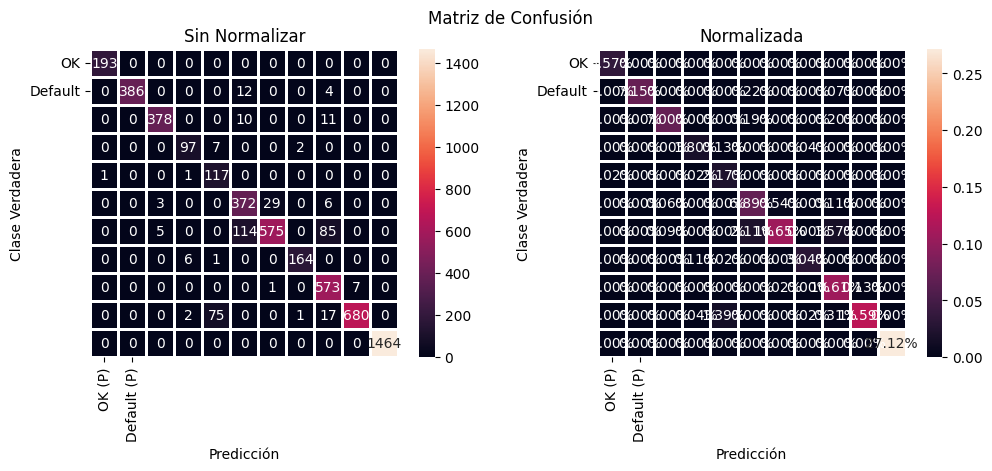

In [28]:
entrenar_modelo(modelo, 'Random Forest', X_train, y_train, X_test, y_test)

### Regresión Logística

In [ ]:
modelo = LogisticRegression(
    solver='liblinear',
    random_state=semilla)

Resultados para el modelo: Regresión Logística
                Modelo  Accuracy  Precision    Recall    ROCAUC  F1-Score  \
0  Regresión Logística  0.864049   0.864568  0.864049  0.983609  0.864102   

     Tiempo  
0  0.591303   



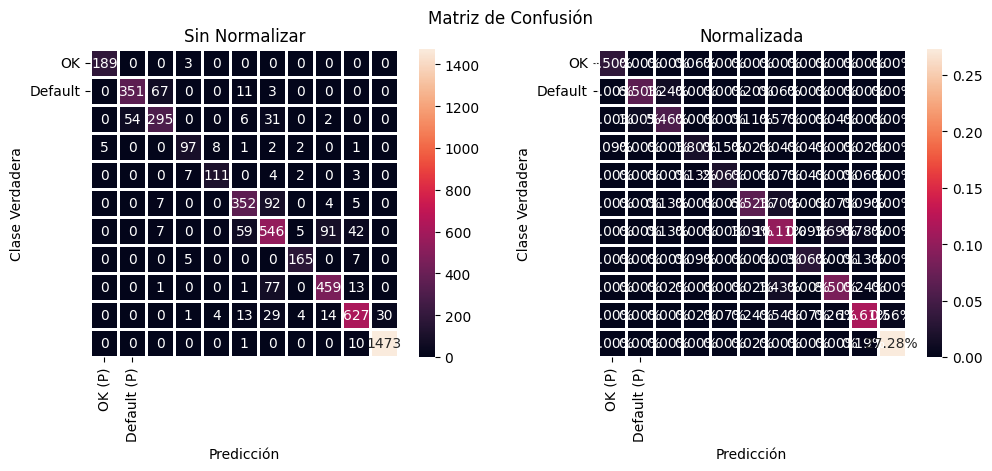

In [ ]:
entrenar_modelo(modelo, 'Regresión Logística', X_train, y_train, X_test, y_test)

##**7) CONCLUSIÓN**

Ambos modelos muestran buenos resultados en sus métricas.

Regresión Logística tiene un rendimiento más bajo, lo que podría hacerla menos adecuada en este contexto. Si el tiempo de ejecución es crítico, podría utilizarse, pero si se requiere un balance de precisión y recall sin importar tanto el tiempo, Random Forest es una mejor opción.